In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow import keras

In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [23]:
x_train.shape,len(y_test)

((60000, 28, 28), 10000)

In [24]:
#x_train[0]

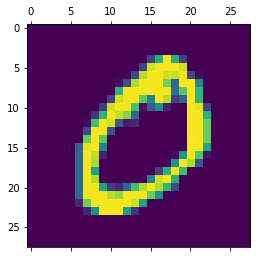

In [25]:
plt.matshow(x_train[1])

In [26]:
x_train_flattern = x_train.reshape(len(x_train),28*28)
x_test_flattern = x_test.reshape(len(x_test),28*28)

In [27]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(28*28,),activation='sigmoid')
])

In [28]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [29]:
model.fit(x_train_flattern,y_train,epochs=5)

Epoch 1/5
  49/1875 [..............................] - ETA: 6s - loss: 1.8400 - accuracy: 0.4337

2021-12-12 01:38:48.799298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.4735 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3042 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2837 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2663 - accuracy: 0.9258


In [30]:
model.evaluate(x_test_flattern,y_test)

 44/313 [===>..........................] - ETA: 0s - loss: 0.3122 - accuracy: 0.9020

2021-12-12 01:39:16.908179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.2702 - accuracy: 0.9236


[0.2701651155948639, 0.9236000180244446]

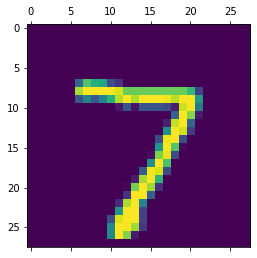

In [35]:
plt.matshow(x_test[0])

In [32]:
y_predict = model.predict(x_test_flattern)

2021-12-12 01:39:18.005152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [36]:
y_predict[0]

array([2.62937173e-02, 2.02462232e-07, 3.49947698e-02, 9.42785561e-01,
       1.73968426e-03, 1.09808736e-01, 1.25711188e-06, 9.99712586e-01,
       7.33082965e-02, 6.13583267e-01], dtype=float32)

In [37]:
np.argmax(y_predict[0])

7

In [38]:
y_predicted_labes = [np.argmax(i) for i in y_predict]

In [44]:
cm=tf.math.confusion_matrix(y_test, predictions = y_predicted_labes)

Text(69.0, 0.5, 'Truth')

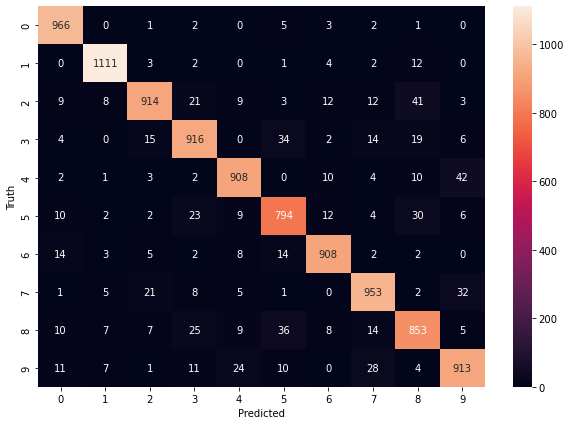

In [50]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
model_with_layers = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model_with_layers.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model_with_layers.fit(x_train,y_train,epochs=10)

Epoch 1/10
  44/1875 [..............................] - ETA: 6s - loss: 1.4363 - accuracy: 0.6087

2021-12-12 01:57:46.841951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.2676 - accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1199 - accuracy: 0.9644
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0847 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0632 - accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0495 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0414 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0325 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0270 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0226 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0189 - accurac

In [59]:
model_with_layers.evaluate(x_test,y_test)

 48/313 [===>..........................] - ETA: 0s - loss: 0.1039 - accuracy: 0.9681

2021-12-12 02:00:19.660907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 0.0735 - accuracy: 0.9784


[0.07350767403841019, 0.9784000515937805]

In [60]:
y_predict = model_with_layers.predict(x_test)

2021-12-12 02:00:51.025876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [61]:
y_predicted_labes = [np.argmax(i) for i in y_predict]

In [62]:
cm=tf.math.confusion_matrix(y_test, predictions = y_predicted_labes)

Text(69.0, 0.5, 'Truth')

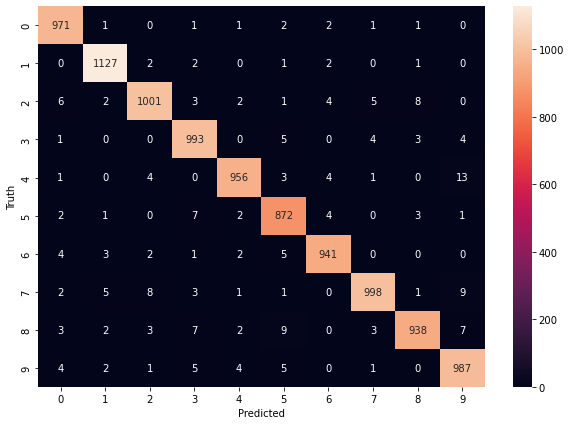

In [63]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')